In [376]:
import pandas as pd
import numpy as np
import re

In [377]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [378]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [379]:
df.head(4)

property_type                 society     sector  price  price_per_sqft  \
0          flat         ambience lagoon  sector 24   4.25         13281.0   
1          flat  capital residences 360  sector 70   1.18          8137.0   
2          flat      umang winter hills  sector 77   0.71          5305.0   
3          flat              rof ananda  sector 95   0.20          5463.0   

     area                                       areaWithType  bedRoom  \
0  3200.0  Super Built up area 3200(297.29 sq.m.)Carpet a...        3   
1  1450.0  Super Built up area 1450(134.71 sq.m.)Built Up...        2   
2  1338.0  Super Built up area 1342(124.68 sq.m.)Carpet a...        2   
3   366.0                  Carpet area: 366.08 (34.01 sq.m.)        1   

   bathroom balcony           additionalRoom  floorNum      facing  \
0         4      3+  servant room,pooja room       3.0  North-East   
1         2       3               pooja room       7.0        East   
2         2       2               study room       6.0  North-West   
3         1       1            not available      10.0        West   

     agePossession                                    nearbyLocations  \
0     10+ Year Old  ['Micromax moulsari avenue metro station', 'In...   
1  0 to 1 Year Old                                                NaN   
2  1 to 5 Year Old  ['Entertainland Mall', 'Delhi Jaipur Expresswa...   
3  1 to 5 Year Old  ['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...   

                                      furnishDetails  \
0  ['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Ge...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                            features  
0  ['Security / Fire Alarm', 'Power Back-up', 'Fe...  
1  ['Security / Fire Alarm', 'Power Back-up', 'Fe...  
2  ['Security / Fire Alarm', 'Power Back-up', 'Fe...  
3  ['Security / Fire Alarm', 'Power Back-up', 'In...

In [380]:
# area col is not consistent therefore it is not reliable

In [381]:
# extract super built up, built up and carpet area
df['areaWithType'].sample(5)

1005                        Carpet area: 1550 (144 sq.m.)
992     Super Built up area 2003(186.08 sq.m.)Built Up...
451                           Plot area 402(336.12 sq.m.)
3                       Carpet area: 366.08 (34.01 sq.m.)
1537    Super Built up area 1020(94.76 sq.m.)Carpet ar...
Name: areaWithType, dtype: object

In [382]:
text = df['areaWithType'].sample().values[0]
text

'Super Built up area 1524(141.58 sq.m.)Built Up area: 1520 sq.ft. (141.21 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.)'

In [383]:
match1 = re.search(r"super built up area (\d+\.?\d+)", text.lower())
match2 = re.search(r"built up area: (\d+\.?\d+)", text.lower())
match3 = re.search(r"carpet area: (\d+\.?\d+)", text.lower())

In [384]:
df['areaWithType'] = df['areaWithType'].str.lower()

In [385]:
def get_area(text, area_type):
    match = re.search(r"{} (\d+\.?\d+)".format(area_type), text)
    if match:
      return float(match.group(1))
    else:
      return None

In [386]:
df.head(2)

property_type                 society     sector  price  price_per_sqft  \
0          flat         ambience lagoon  sector 24   4.25         13281.0   
1          flat  capital residences 360  sector 70   1.18          8137.0   

     area                                       areaWithType  bedRoom  \
0  3200.0  super built up area 3200(297.29 sq.m.)carpet a...        3   
1  1450.0  super built up area 1450(134.71 sq.m.)built up...        2   

   bathroom balcony           additionalRoom  floorNum      facing  \
0         4      3+  servant room,pooja room       3.0  North-East   
1         2       3               pooja room       7.0        East   

     agePossession                                    nearbyLocations  \
0     10+ Year Old  ['Micromax moulsari avenue metro station', 'In...   
1  0 to 1 Year Old                                                NaN   

                                      furnishDetails  \
0  ['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Ge...   
1                                                NaN   

                                            features  
0  ['Security / Fire Alarm', 'Power Back-up', 'Fe...  
1  ['Security / Fire Alarm', 'Power Back-up', 'Fe...

In [387]:
df['super_built_up_area'] = df['areaWithType'].apply(lambda x : get_area(x, 'super built up area'))

In [388]:
df['built_up_area'] = df['areaWithType'].apply(lambda x : get_area(x, 'built up area:'))

In [389]:
df['carpet_area'] = df['areaWithType'].apply(lambda x : get_area(x, 'carpet area:'))

In [390]:
df.head(2)

property_type                 society     sector  price  price_per_sqft  \
0          flat         ambience lagoon  sector 24   4.25         13281.0   
1          flat  capital residences 360  sector 70   1.18          8137.0   

     area                                       areaWithType  bedRoom  \
0  3200.0  super built up area 3200(297.29 sq.m.)carpet a...        3   
1  1450.0  super built up area 1450(134.71 sq.m.)built up...        2   

   bathroom balcony           additionalRoom  floorNum      facing  \
0         4      3+  servant room,pooja room       3.0  North-East   
1         2       3               pooja room       7.0        East   

     agePossession                                    nearbyLocations  \
0     10+ Year Old  ['Micromax moulsari avenue metro station', 'In...   
1  0 to 1 Year Old                                                NaN   

                                      furnishDetails  \
0  ['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Ge...   
1                                                NaN   

                                            features  super_built_up_area  \
0  ['Security / Fire Alarm', 'Power Back-up', 'Fe...               3200.0   
1  ['Security / Fire Alarm', 'Power Back-up', 'Fe...               1450.0   

   built_up_area  carpet_area  
0            NaN       3156.0  
1         1400.0       1000.0

In [391]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area'],
      dtype='object')

In [392]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [393]:
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [394]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

price property_type         area  \
3690   3.40          flat  2185.000000   
3673   2.50         house   963.020031   
3803   5.00         house  1125.011250   
1849   0.89          flat  2037.000000   
3716   8.35          flat  4279.000000   

                                           areaWithType  super_built_up_area  \
3690             super built up area 2185(202.99 sq.m.)               2185.0   
3673                         plot area 107(89.47 sq.m.)                  NaN   
3803  plot area 125(104.52 sq.m.)built up area: 115 ...                  NaN   
1849             super built up area 2025(188.13 sq.m.)               2025.0   
3716             super built up area 4279(397.53 sq.m.)               4279.0   

      built_up_area  carpet_area  
3690            NaN          NaN  
3673            NaN          NaN  
3803          115.0        100.0  
1849            NaN          NaN  
3716            NaN          NaN

In [395]:
df.duplicated().sum()

np.int64(122)

In [396]:
# flats where all the values of area is present
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [397]:
# extract rows with plot area
df[df['areaWithType'].str.contains('plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(6)

price property_type         area  \
3053   0.90         house   785.066294   
286    7.49         house  2699.974767   
2244    NaN         house          NaN   
1974   0.60         house    57.000086   
270   11.30         house  4500.019912   
3660   5.75         house  2430.056631   

                                           areaWithType  super_built_up_area  \
3053                         plot area 785(72.93 sq.m.)                  NaN   
286                         plot area 300(250.84 sq.m.)                  NaN   
2244  plot area 250(209.03 sq.m.)built up area: 260 ...                  NaN   
1974                            plot area 57(5.3 sq.m.)                  NaN   
270   plot area 500(418.06 sq.m.)built up area: 480 ...                  NaN   
3660  plot area 270(225.75 sq.m.)built up area: 260 ...                  NaN   

      built_up_area  carpet_area  
3053            NaN          NaN  
286             NaN          NaN  
2244          260.0        245.0  
1974            NaN          NaN  
270           480.0        460.0  
3660          260.0        220.0

In [398]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 20
facing                 1113
agePossession             1
nearbyLocations         180
furnishDetails          989
features                643
super_built_up_area    1909
built_up_area          2635
carpet_area            1875
dtype: int64

In [399]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [400]:
all_nan_df.head()

price property_type         area                  areaWithType  \
15   5.60         house  3239.990743   plot area 360(301.01 sq.m.)   
16   0.90         house   900.000000    plot area 900(83.61 sq.m.)   
20   2.90         house  2700.186220  plot area 2700(250.84 sq.m.)   
21   1.27         house  1570.033379  plot area 1570(145.86 sq.m.)   
23   2.20         house  1800.032728  plot area 1800(167.23 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
15                  NaN            NaN          NaN  
16                  NaN            NaN          NaN  
20                  NaN            NaN          NaN  
21                  NaN            NaN          NaN  
23                  NaN            NaN          NaN

In [401]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [402]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(lambda x : get_area(x, 'plot area'))

In [403]:
all_nan_df.sample(10)

price property_type          area                     areaWithType  \
522    7.00         house   6227.758007       plot area 692(578.6 sq.m.)   
1178   0.80         house    674.991563        plot area 75(62.71 sq.m.)   
517    1.50         house   1350.013500      plot area 150(125.42 sq.m.)   
3482   5.15         house   1934.999061      plot area 215(179.77 sq.m.)   
3239   0.38         house    900.047371       plot area 900(83.61 sq.m.)   
1099   5.80         house   1800.012414      plot area 200(167.23 sq.m.)   
1493   1.45         house  26032.315978   plot area 26000(2415.48 sq.m.)   
2268   7.00         house   1782.758182  plot area 1782.72(165.62 sq.m.)   
3435   6.50         house   4320.085072      plot area 480(401.34 sq.m.)   
3479   9.90         house   3375.038353      plot area 375(313.55 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
522                   NaN         692.00          NaN  
1178                  NaN          75.00          NaN  
517                   NaN         150.00          NaN  
3482                  NaN         215.00          NaN  
3239                  NaN         900.00          NaN  
1099                  NaN         200.00          NaN  
1493                  NaN       26000.00          NaN  
2268                  NaN        1782.72          NaN  
3435                  NaN         480.00          NaN  
3479                  NaN         375.00          NaN

In [404]:
def convert_scale(row) :
  if np.isnan(row['area']) or np.isnan(row['built_up_area']) :
    return row['built_up_area']
  else :
    if round(row['area']/row['built_up_area']) == 9:
      return row['built_up_area']*9
    elif round(row['area']/row['built_up_area']) == 11:
      return row['built_up_area']*10.7
  return row['built_up_area']

In [405]:
all_nan_df.head()

price property_type         area                  areaWithType  \
15   5.60         house  3239.990743   plot area 360(301.01 sq.m.)   
16   0.90         house   900.000000    plot area 900(83.61 sq.m.)   
20   2.90         house  2700.186220  plot area 2700(250.84 sq.m.)   
21   1.27         house  1570.033379  plot area 1570(145.86 sq.m.)   
23   2.20         house  1800.032728  plot area 1800(167.23 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
15                  NaN          360.0          NaN  
16                  NaN          900.0          NaN  
20                  NaN         2700.0          NaN  
21                  NaN         1570.0          NaN  
23                  NaN         1800.0          NaN

In [406]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale, axis = 1)

In [407]:
all_nan_df.head()

price property_type         area                  areaWithType  \
15   5.60         house  3239.990743   plot area 360(301.01 sq.m.)   
16   0.90         house   900.000000    plot area 900(83.61 sq.m.)   
20   2.90         house  2700.186220  plot area 2700(250.84 sq.m.)   
21   1.27         house  1570.033379  plot area 1570(145.86 sq.m.)   
23   2.20         house  1800.032728  plot area 1800(167.23 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
15                  NaN         3240.0          NaN  
16                  NaN          900.0          NaN  
20                  NaN         2700.0          NaN  
21                  NaN         1570.0          NaN  
23                  NaN         1800.0          NaN

In [408]:
df.update(all_nan_df)

In [409]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 20
facing                 1113
agePossession             1
nearbyLocations         180
furnishDetails          989
features                643
super_built_up_area    1909
built_up_area          2075
carpet_area            1875
dtype: int64

In [410]:
df['additionalRoom'].apply(lambda x : len(x.split(','))).value_counts()

additionalRoom
1    3048
2     443
4     188
3     146
Name: count, dtype: int64

In [411]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1598
servant room                                      707
study room                                        250
others                                            227
pooja room                                        165
store room                                        101
study room,servant room                            99
pooja room,servant room                            83
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          55
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              23
pooja room,others                                  17
pooja room,store room                              15
servant room,study room                            13
pooja room,store room,study room,servant room      12
study room,servant room,store room                 11
servant room,study room,pooja room,store room      11
pooja room,servant room,others                     11
study room,pooja room                              10
store room,servant room                             8
study room,servant room,pooja room,store room       8
study room,pooja room,servant room                  7
pooja room,study room,store room                    7
study room,servant room,others                      7
pooja room,servant room,store room                  7
others,servant room                                 6
servant room,pooja room,store room                  6
store room,pooja room                               5
pooja room,servant room,study room,store room       5
study room,servant room,store room,pooja room       5
study room,servant room,pooja room                  4
pooja room,study room,others                        4
servant room,store room,pooja room                  4
study room,pooja room,store room                    4
servant room,pooja room,study room,store room       3
pooja room,study room,store room,servant room       3
servant room,others,pooja room                      3
servant room,study room,pooja room                  3
study room,pooja room,servant room,store room       3
study room,store room                               2
servant room,others,store room,pooja room           2
store room,pooja room,study room                    2
store room,pooja room,study room,servant room       2
store room,pooja room,servant room                  2
servant room,study room,store room                  2
study room,pooja room,store room,servant room       2
servant room,study room,store room,pooja room       1
store room,servant room,study room,pooja room       1
store room,study room,servant room                  1
study room,store room,pooja room                    1
pooja room,store room,servant room                  1
servant room,study room,others                      1
others,study room                                   1
store room,study room                               1
servant room,store room,study room,pooja room       1
servant room,pooja room,study room                  1
study room,others,servant room                      1
store room,pooja room,servant room,study room       1
servant room,pooja room,store room,study room       1
store room,servant room,pooja room                  1
Name: count, dtype: int64

In [412]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [413]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

additionalRoom  study room  servant room  store room  pooja room  others
1042  not available           0             0           0           0       0
681   not available           0             0           0           0       0
3397   servant room           0             1           0           0       0
2212  not available           0             0           0           0       0
2965  not available           0             0           0           0       0

In [414]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [415]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [416]:
df['agePossession'].value_counts()

agePossession
Relatively New        1681
New Property           627
Moderately Old         581
Undefined              337
Old Property           316
Under Construction     283
Name: count, dtype: int64

In [417]:
df[['furnishDetails', 'features']].sample(5)

furnishDetails  \
3486                                                NaN   
1374                                                NaN   
327   ['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '3 Li...   
3439                                                 []   
312   ['5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Lig...   

                                               features  
3486  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...  
1374                              ['Maintenance Staff']  
327   ['Power Back-up', 'Feng Shui / Vaastu Complian...  
3439  ['Security / Fire Alarm', 'Power Back-up', 'Fe...  
312   ['Centrally Air Conditioned', 'Water purifier'...

In [418]:
# to handle the furnish_details col we have two options
# 1. one hot encode -> issue here is that not all items are important and also what if items are correlated
# 2. create 3 new features -> a. furnished, b. semi-furnished, c. unfurnished, issue -> how to decide?
# sol? -> clustering after one hot encoding to label the data

In [419]:
text = df['furnishDetails'].value_counts().sample().index[0]
text

"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Microwave', '11 Light', '5 Curtains', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"

In [420]:
#  remove brackets and create unique categories
all_furnishings = []
for furnishings in df['furnishDetails'].dropna().str.replace('[', '').str.replace(']', '').str.split(','):
  furnishing = []
  pattern = re.compile(r'(\d+|No)')
  for items in furnishings :
    word = re.sub(pattern, '', items).strip()
    cleaned_text = re.sub(r"[^\w]", "", word)
    if cleaned_text :
      furnishing.append(cleaned_text)
  all_furnishings.extend(furnishing)

In [421]:
print(all_furnishings)

['Wardrobe', 'Fan', 'ExhaustFan', 'Geyser', 'Light', 'ModularKitchen', 'AC', 'Chimney', 'Bed', 'Curtains', 'DiningTable', 'Microwave', 'Fridge', 'Sofa', 'Stove', 'TV', 'WashingMachine', 'WaterPurifier', 'Wardrobe', 'Fan', 'ExhaustFan', 'Geyser', 'Stove', 'Light', 'Curtains', 'Chimney', 'ModularKitchen', 'AC', 'Bed', 'DiningTable', 'Microwave', 'Fridge', 'Sofa', 'TV', 'WashingMachine', 'WaterPurifier', 'Wardrobe', 'Fan', 'ExhaustFan', 'Geyser', 'Light', 'Chimney', 'ModularKitchen', 'AC', 'Bed', 'Curtains', 'DiningTable', 'Microwave', 'Fridge', 'Sofa', 'Stove', 'TV', 'WashingMachine', 'WaterPurifier', 'WaterPurifier', 'Fan', 'Fridge', 'ExhaustFan', 'Geyser', 'Stove', 'Light', 'ModularKitchen', 'Chimney', 'Curtains', 'Bed', 'Wardrobe', 'Sofa', 'WashingMachine', 'Microwave', 'AC', 'DiningTable', 'TV', 'Microwave', 'AC', 'Chimney', 'ModularKitchen', 'Bed', 'Curtains', 'DiningTable', 'ExhaustFan', 'Fan', 'Geyser', 'Light', 'Fridge', 'Sofa', 'Stove', 'TV', 'Wardrobe', 'WashingMachine', 'Water

In [422]:
len(set(all_furnishings))

18

In [423]:
all_categories = list(set(all_furnishings))
all_categories

['ExhaustFan',
 'Light',
 'Chimney',
 'AC',
 'Stove',
 'Curtains',
 'Geyser',
 'Fridge',
 'DiningTable',
 'Sofa',
 'WaterPurifier',
 'Bed',
 'TV',
 'Fan',
 'ModularKitchen',
 'Wardrobe',
 'WashingMachine',
 'Microwave']

In [424]:
def get_furnishing_count(row, furnishing) :
  if type(row) != str :
    return 0
  pattern = re.compile(r'(\d+|No) {}'.format(furnishing))
  match = pattern.search(row)
  if match :
    return match.group(1) if match.group(1) != 'No' else 0
  return 0

In [425]:
text

"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Microwave', '11 Light', '5 Curtains', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"

In [426]:
print(get_furnishing_count(text, 'Wardrobe'))
print(get_furnishing_count(text, 'Sofa'))
print(get_furnishing_count(text, 'TV'))

3
0
0


In [427]:
for category in all_categories :
  df[category] = df['furnishDetails'].apply(lambda x : get_furnishing_count(x, category))

In [428]:
df.head(2)

property_type                 society     sector  price  price_per_sqft  \
0          flat         ambience lagoon  sector 24   4.25         13281.0   
1          flat  capital residences 360  sector 70   1.18          8137.0   

     area                                       areaWithType  bedRoom  \
0  3200.0  super built up area 3200(297.29 sq.m.)carpet a...        3   
1  1450.0  super built up area 1450(134.71 sq.m.)built up...        2   

   bathroom balcony           additionalRoom  floorNum      facing  \
0         4      3+  servant room,pooja room       3.0  North-East   
1         2       3               pooja room       7.0        East   

  agePossession                                    nearbyLocations  \
0  Old Property  ['Micromax moulsari avenue metro station', 'In...   
1  New Property                                                NaN   

                                      furnishDetails  \
0  ['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Ge...   
1                                                NaN   

                                            features  super_built_up_area  \
0  ['Security / Fire Alarm', 'Power Back-up', 'Fe...               3200.0   
1  ['Security / Fire Alarm', 'Power Back-up', 'Fe...               1450.0   

   built_up_area  carpet_area  study room  servant room  store room  \
0            NaN       3156.0           0             1           0   
1         1400.0       1000.0           0             0           0   

   pooja room  others  ExhaustFan Light Chimney AC Stove Curtains Geyser  \
0           1       0           0    10       1  5     0        0      4   
1           1       0           0     0       0  0     0        0      0   

  Fridge  DiningTable Sofa  WaterPurifier Bed TV Fan  ModularKitchen Wardrobe  \
0      0            0    0              0   0  0   8               0        4   
1      0            0    0              0   0  0   0               0        0   

   WashingMachine Microwave  
0               0         0  
1               0         0

In [429]:
furnishing_df = df[all_categories]

In [430]:
furnishing_df.shape

(3825, 18)

In [431]:
df.drop(columns = all_categories, inplace = True)

In [432]:
df.shape

(3825, 25)

In [433]:
df.head()

property_type                 society     sector  price  price_per_sqft  \
0          flat         ambience lagoon  sector 24   4.25         13281.0   
1          flat  capital residences 360  sector 70   1.18          8137.0   
2          flat      umang winter hills  sector 77   0.71          5305.0   
3          flat              rof ananda  sector 95   0.20          5463.0   
4          flat    shree vardhman flora  sector 90   0.90          4615.0   

     area                                       areaWithType  bedRoom  \
0  3200.0  super built up area 3200(297.29 sq.m.)carpet a...        3   
1  1450.0  super built up area 1450(134.71 sq.m.)built up...        2   
2  1338.0  super built up area 1342(124.68 sq.m.)carpet a...        2   
3   366.0                  carpet area: 366.08 (34.01 sq.m.)        1   
4  1950.0             super built up area 1950(181.16 sq.m.)        3   

   bathroom balcony           additionalRoom  floorNum      facing  \
0         4      3+  servant room,pooja room       3.0  North-East   
1         2       3               pooja room       7.0        East   
2         2       2               study room       6.0  North-West   
3         1       1            not available      10.0        West   
4         4       3             servant room       4.0        East   

    agePossession                                    nearbyLocations  \
0    Old Property  ['Micromax moulsari avenue metro station', 'In...   
1    New Property                                                NaN   
2  Relatively New  ['Entertainland Mall', 'Delhi Jaipur Expresswa...   
3  Relatively New  ['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...   
4  Relatively New  ['IRIS Broadway Mall', 'Dwarka Expressway', 'S...   

                                      furnishDetails  \
0  ['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Ge...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                            features  super_built_up_area  \
0  ['Security / Fire Alarm', 'Power Back-up', 'Fe...               3200.0   
1  ['Security / Fire Alarm', 'Power Back-up', 'Fe...               1450.0   
2  ['Security / Fire Alarm', 'Power Back-up', 'Fe...               1342.0   
3  ['Security / Fire Alarm', 'Power Back-up', 'In...                  NaN   
4  ['Centrally Air Conditioned', 'Water purifier'...               1950.0   

   built_up_area  carpet_area  study room  servant room  store room  \
0            NaN  3156.000000           0             1           0   
1         1400.0  1000.000000           0             0           0   
2            NaN   810.000000           1             0           0   
3            NaN   366.080239           0             0           0   
4            NaN          NaN           0             1           0   

   pooja room  others  
0           1       0  
1           1       0  
2           0       0  
3           0       0  
4           0       0

In [434]:
# apply k means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishing_df)
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

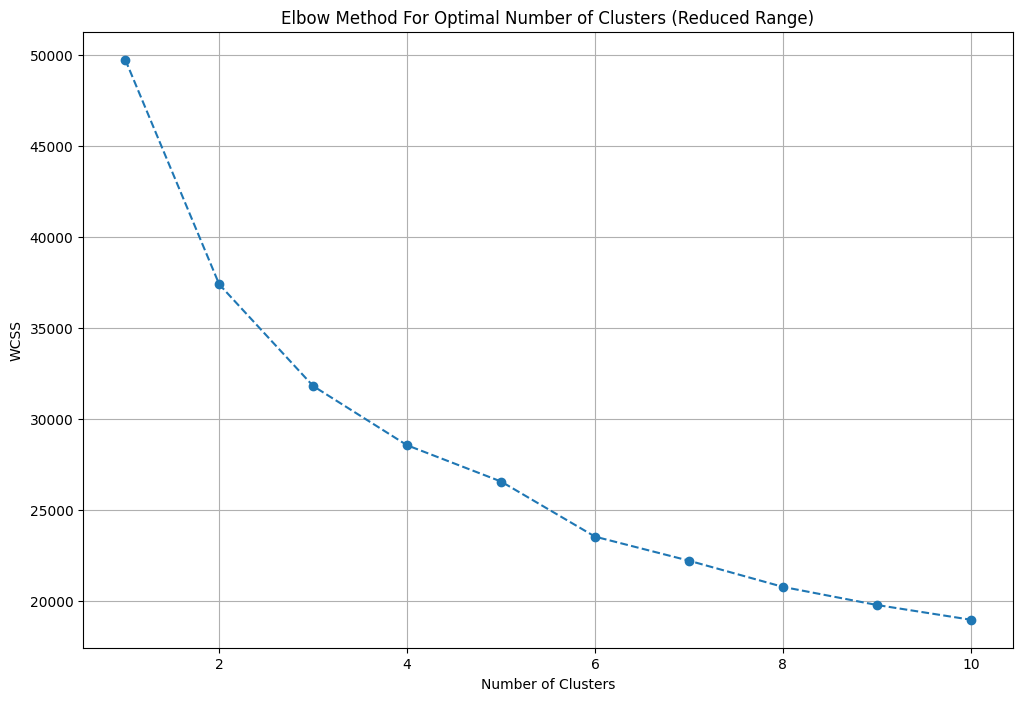

In [435]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [436]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [437]:
df['furnishing_type'] = cluster_assignments

In [438]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

furnishDetails  furnishing_type
1115  ['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...                0
2558                                                NaN                0
1788  ['3 Wardrobe', '6 Fan', '3 Geyser', '15 Light'...                1
950                                                  []                0
3232  ['3 Light', '3 AC', 'No Bed', 'No Chimney', 'N...                0

In [439]:
df['furnishing_type'].value_counts()

furnishing_type
0    2806
1     814
2     205
Name: count, dtype: int64

In [440]:
df[['society','features']].sample(5)

society                                           features
1960    emaar mgf marbella  ['Private Garden / Terrace', 'Maintenance Staf...
2947  emaar gurgaon greens  ['Centrally Air Conditioned', 'Water purifier'...
2620          tulip violet  ['Centrally Air Conditioned', 'Water purifier'...
2855  bptp astaire gardens  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
3378            rof ananda  ['Security / Fire Alarm', 'Power Back-up', 'In...

In [441]:
app_df = pd.read_csv('apartments.csv')
app_df.head(2)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1           M3M Crown     3, 4 BHK Apartment in Sector 111, Gurgaon   

                                     NearbyLocations  \
0  ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap Un...   

                                  LocationAdvantages  \
0  {'Bajghera Road': '800 Meter', 'Palam Vihar Ha...   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...   

                                                Link  \
0  https://www.99acres.com/smartworld-one-dxp-sec...   
1  https://www.99acres.com/m3m-crown-sector-111-g...   

                                        PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area...   
1  {'3 BHK': {'building_type': 'Apartment', 'area...   

                                       TopFacilities  
0  ['Swimming Pool', 'Salon', 'Restaurant', 'Spa'...  
1  ['Bowling Alley', 'Mini Theatre', 'Manicured G...

In [442]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [443]:
temp_df = df[df['features'].isnull()]

In [444]:
temp_df.shape

(643, 26)

In [445]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [446]:
df.loc[temp_df.index,'features'] = x.values

In [447]:
df['features'].isnull().sum()

np.int64(488)

In [448]:
df['features'].sample(5)

2068    ['Feng Shui / Vaastu Compliant', 'Security / F...
2927    ['Lift(s)', 'Maintenance Staff', 'Water Storag...
1099    ['False Ceiling Lighting', 'Park', 'Low Densit...
2417                                                  NaN
3393    ['Water purifier', 'Security / Fire Alarm', 'P...
Name: features, dtype: object

In [456]:
from ast import literal_eval
import ast
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

In [457]:
df['features_list']

0       [Security / Fire Alarm, Power Back-up, Feng Sh...
1       [Security / Fire Alarm, Power Back-up, Feng Sh...
2       [Security / Fire Alarm, Power Back-up, Feng Sh...
3       [Security / Fire Alarm, Power Back-up, Interco...
4       [Centrally Air Conditioned, Water purifier, Se...
5       [Security / Fire Alarm, Feng Shui / Vaastu Com...
6                                         [Lift(s), Park]
7                              [Lift(s), Park, Piped-gas]
8       [Water purifier, Centrally Air Conditioned, Se...
9                                                      []
10      [Feng Shui / Vaastu Compliant, Security / Fire...
11      [Water purifier, Centrally Air Conditioned, Se...
12      [Feng Shui / Vaastu Compliant, Security / Fire...
13      [Security / Fire Alarm, Private Garden / Terra...
14      [Security / Fire Alarm, Lift(s), Water purifie...
15                                                     []
16                                        [Water Storage]
17                                                     []
18      [Security / Fire Alarm, Private Garden / Terra...
19                                                     []
20                                        [Water Storage]
21      [Feng Shui / Vaastu Compliant, Private Garden ...
22                                                     []
23      [Private Garden / Terrace, Park, Visitor Parking]
24      [Feng Shui / Vaastu Compliant, Security / Fire...
25      [Security / Fire Alarm, Intercom Facility, Lif...
26      [Security / Fire Alarm, Lift(s), Water Storage...
27                       [Water Storage, Park, Piped-gas]
28      [Water purifier, Security / Fire Alarm, Power ...
29      [Security / Fire Alarm, Feng Shui / Vaastu Com...
30                                                     []
31      [Security / Fire Alarm, Lift(s), Maintenance S...
32                                                     []
33      [Power Back-up, Intercom Facility, Lift(s), Sw...
34                                                     []
35      [Power Back-up, Intercom Facility, Lift(s), Hi...
36      [Power Back-up, Feng Shui / Vaastu Compliant, ...
37      [Security / Fire Alarm, Intercom Facility, Lif...
38      [Feng Shui / Vaastu Compliant, Security / Fire...
39                                                     []
40      [Lift(s), Swimming Pool, Park, Internet/wi-fi ...
41      [Security / Fire Alarm, Intercom Facility, Lif...
42      [Security / Fire Alarm, Feng Shui / Vaastu Com...
43      [Security / Fire Alarm, Feng Shui / Vaastu Com...
44                                                     []
45      [Feng Shui / Vaastu Compliant, Private Garden ...
46      [Lift(s), Swimming Pool, Park, Shopping Centre...
47      [Centrally Air Conditioned, Water purifier, Se...
48      [Power Back-up, Feng Shui / Vaastu Compliant, ...
49      [Feng Shui / Vaastu Compliant, Security / Fire...
50      [Milk Booth, Clinic, Swimming Pool, Business L...
51                                    [Maintenance Staff]
52      [Centrally Air Conditioned, Water purifier, Se...
53      [Feng Shui / Vaastu Compliant, Lift(s), Swimmi...
54      [Security / Fire Alarm, Intercom Facility, Lif...
55      [Feng Shui / Vaastu Compliant, Security / Fire...
56      [Security / Fire Alarm, Feng Shui / Vaastu Com...
57      [Centrally Air Conditioned, Water purifier, Se...
58      [Swimming Pool, School, Jacuzzi, Shopping Cent...
59      [High Ceiling Height, Maintenance Staff, Separ...
60      [Feng Shui / Vaastu Compliant, Private Garden ...
61      [Power Back-up, Intercom Facility, Lift(s), Sw...
62      [Feng Shui / Vaastu Compliant, Security / Fire...
63                                        [Natural Light]
64      [Feng Shui / Vaastu Compliant, Intercom Facili...
65      [Feng Shui / Vaastu Compliant, Maintenance Sta...
66      [Security / Fire Alarm, Intercom Facility, Lif...
67      [Feng Shui / Vaastu Compliant, Private Garden ...
68      [Feng Shui / Vaastu Compliant, Security / Fire..

In [458]:
from sklearn.preprocessing import MultiLabelBinarizer
# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [460]:
features_binary_df.sample(3)

24/7 Power Backup  24/7 Water Supply  24x7 Security  ATM  \
1877                  0                  0              0    0   
1354                  0                  0              0    0   
2895                  0                  0              0    0   

      Aerobics Centre  Air Hockey  Airy Rooms  Amphitheatre  \
1877                0           0           1             0   
1354                0           0           0             0   
2895                0           0           0             0   

      Automated Car Wash  Badminton Court  Bank Attached Property  \
1877                   0                0                       1   
1354                   0                0                       1   
2895                   0                0                       0   

      Banquet Hall  Bar/Chill-Out Lounge  Barbecue  Basketball Court  \
1877             0                     0         0                 0   
1354             0                     0         0                 0   
2895             0                     0         0                 0   

      Beach Volley Ball Court  Billiards  Bowling Alley  Bus Shelter  \
1877                        0          0              0            0   
1354                        0          0              0            0   
2895                        0          0              0            0   

      Business Lounge  CCTV Camera Security  Cafeteria  Car Parking  \
1877                0                     0          0            0   
1354                0                     0          0            0   
2895                0                     0          0            0   

      Car wash area  Card Room  Centrally Air Conditioned  Changing Area  \
1877              0          0                          1              0   
1354              0          0                          0              0   
2895              0          0                          0              0   

      Children's Play Area  Cigar Lounge  Clinic  Club House  \
1877                     0             0       0           0   
1354                     0             0       0           0   
2895                     0             0       0           0   

      Club house / Community Center  Community Hall  Concierge Service  \
1877                              1               0                  0   
1354                              0               0                  0   
2895                              1               0                  0   

      Conference room  Creche/Day care  Cricket Pitch  Doctor on Call  \
1877                0                0              0               0   
1354                0                0              0               0   
2895                0                0              0               0   

      Earthquake Resistant  Entrance Lobby  False Ceiling Lighting  \
1877                     0               0                       1   
1354                     0               0                       1   
2895                     0               0                       1   

      Feng Shui / Vaastu Compliant  Fire Fighting Systems  \
1877                             1                      0   
1354                             0                      0   
2895                             1                      0   

      Fitness Centre / GYM  Flower Garden  Food Court  Foosball  Football  \
1877                     1              0           0         0         0   
1354                     1              0           0         0         0   
2895                     1              0           0         0         0   

      Fountain  Gated Community  Gazebo  Golf Course  Grocery Shop  Gymnasium  \
1877         0                0       0            0             0          0   
1354         0                0       0            0             0          0   
2895         0                0       0            0             0          0   

      High Ceiling Height  High Spee

In [462]:
features_binary_df.shape

(3825, 130)

In [ ]:
# again we have two options
# 1. one hot encode -> issue - 130 cols
# 2. clustering to merge similar rows

In [463]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

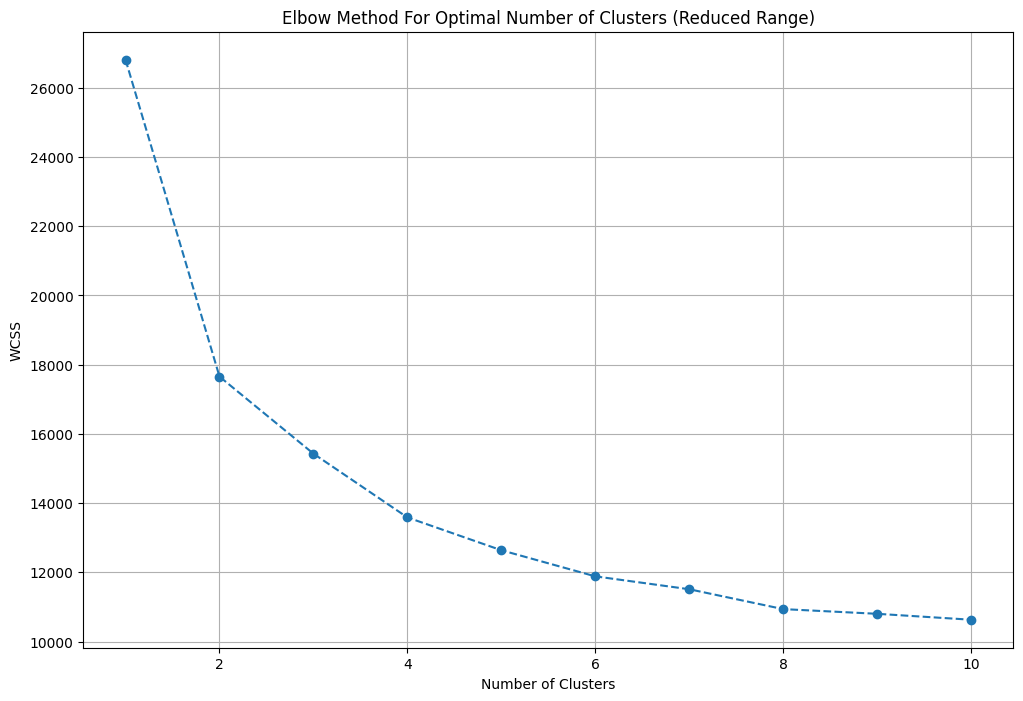

In [464]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [465]:
n_clusters = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_binary_df)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(features_binary_df)

In [466]:
temp_df = df.copy()
temp_df['features_cluster'] = cluster_assignments

In [467]:
temp_df['features_cluster'].value_counts()

features_cluster
0    2394
1    1431
Name: count, dtype: int64

In [476]:
temp_df[temp_df['features_cluster'] == 0]['features']

6                                                                                                                                                                                                                                                                                                                          ['Lift(s)', 'Park']
7                                                                                                                                                                                                                                                                                                             ['Lift(s)', 'Park', 'Piped-gas']
9                                                                                                                                                                                                                                                                                                                                          NaN
10                                                                                                                                                                                  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']
12                                                                                                                                                                                  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']
13                                                         ['Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Club house / Community Center']
15                                                                                                                                                                                                                                                                                                                                         NaN
16                                                                                                                                                                                                                                                                                                                           ['Water Storage']
17                                                                                                                                                                                                                                                                                                                                         NaN
18                                                         ['Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Club house / Community Center']
19                                                                                                                                                                                                                                                                                                                                         NaN
20                                                                                                                                                                                                                                                                                                                         

In [474]:
pd.set_option('display.max_colwidth', None)

In [475]:
temp_df[temp_df['features_cluster'] == 1]['features']

0                                                                                                                                                                                     ['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']
1                                                                                                                                                                                                     ['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']
2                                                                                                                                                                                                                                                                            ['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']
3                                                                                                                                                                                                                                                                                                                                                                                                                    ['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']
4                             ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']
5                                                                                                                                                                                                                                                                                                                                                                                       ['Security / Fire Alarm', 'Feng Shui / 

In [ ]:
# we can use this but a better approach would be luxury score

In [477]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
     'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [478]:
df['luxury_score'] = luxury_score

In [479]:
df.head()

property_type                 society     sector  price  price_per_sqft  \
0          flat         ambience lagoon  sector 24   4.25         13281.0   
1          flat  capital residences 360  sector 70   1.18          8137.0   
2          flat      umang winter hills  sector 77   0.71          5305.0   
3          flat              rof ananda  sector 95   0.20          5463.0   
4          flat    shree vardhman flora  sector 90   0.90          4615.0   

     area  \
0  3200.0   
1  1450.0   
2  1338.0   
3   366.0   
4  1950.0   

                                                                                                           areaWithType  \
0                                          super built up area 3200(297.29 sq.m.)carpet area: 3156 sq.ft. (293.2 sq.m.)   
1  super built up area 1450(134.71 sq.m.)built up area: 1400 sq.ft. (130.06 sq.m.)carpet area: 1000 sq.ft. (92.9 sq.m.)   
2                                           super built up area 1342(124.68 sq.m.)carpet area: 810 sq.ft. (75.25 sq.m.)   
3                                                                                     carpet area: 366.08 (34.01 sq.m.)   
4                                                                                super built up area 1950(181.16 sq.m.)   

   bedRoom  bathroom balcony           additionalRoom  floorNum      facing  \
0        3         4      3+  servant room,pooja room       3.0  North-East   
1        2         2       3               pooja room       7.0        East   
2        2         2       2               study room       6.0  North-West   
3        1         1       1            not available      10.0        West   
4        3         4       3             servant room       4.0        East   

    agePossession  \
0    Old Property   
1    New Property   
2  Relatively New   
3  Relatively New   
4  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              nearbyLocations  \
0  ['Micromax moulsari avenue metro station', 'Indusind bank cyber city metro station', 'Dlf phase 3 metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Citibank ATM', 'Icici bank ATM', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Dental Harbour', 'Asha Multispeciality Clinic', 'Garg Dental Care', 'R.N Clinic', 'Shri Ram Memorial Hospital', 'Dental Cure and Care Centre', "Dr. Khullar's Dental Clinic", 'Darpan Skin & Mind Clinic', 'DGD Rajokari', 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Cosmodentz Dental Clinic', 'Upkar Clinic', 'Pharmacy', 'Shri Balaji Medical Store', 'SP Infocity', 'PVR Cinames', 'State bank of india', 'Deutsche bank', 'Icici bank', 'Icici bank', 'Standard chartered bank', 'Machaan', 'barrique', 'The God Father', 'Food Court', 'Mc Donalds', "McDonald's", 'Cantine', 'Mukesh Dhaba']   
1                                                                                                                                                                                                    

In [480]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [481]:
df.sample(5)

property_type                      society      sector  price  \
436           flat                  godrej icon   sector 88   1.62   
1561          flat       experion the heartsong  sector 108   1.20   
662           flat  bestech park view residency    sector 2   0.55   
786           flat                  ss the leaf   sector 85   1.20   
2732          flat                m3m soulitude   sector 89   1.42   

      price_per_sqft    area  \
436          10018.0  1617.0   
1561          6825.0  1758.0   
662           8461.0   650.0   
786           7317.0  1640.0   
2732          9978.0  1423.0   

                                                                                                             areaWithType  \
436                                                                                super built up area 1617(150.22 sq.m.)   
1561  super built up area 1758(163.32 sq.m.)built up area: 1550 sq.ft. (144 sq.m.)carpet area: 1400 sq.ft. (130.06 sq.m.)   
662                                                                                  super built up area 650(60.39 sq.m.)   
786                                         super built up area 1640(152.36 sq.m.)carpet area: 1148 sq.ft. (106.65 sq.m.)   
2732                                                                                      carpet area: 1423 (132.2 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing   agePossession  \
436         3         2      3+      10.0        East  Relatively New   
1561        3         2      3+      11.0  North-East  Relatively New   
662         1         1       2       7.0       North  Moderately Old   
786         2         2      3+      14.0        East  Relatively New   
2732        3         3       2       3.0         NaN    New Property   

      super_built_up_area  built_up_area  carpet_area  study room  \
436                1617.0            NaN          NaN           1   
1561               1758.0         1550.0       1400.0           0   
662                 650.0            NaN          NaN           0   
786                1640.0            NaN       1148.0           0   
2732                  NaN            NaN       1423.0           0   

      servant room  store room  pooja room  others  furnishing_type  \
436              0           0           0       0                2   
1561             1           0           1       0                0   
662              0           0           0       0                0   
786              0           1           0       0                0   
2732             0           0           0       0                0   

      luxury_score  
436             49  
1561           174  
662             31  
786            141  
2732            15

In [482]:
df.shape

(3825, 23)

In [483]:
df.to_csv('gurgaon_propertis_cleaned_v2.csv', index=False)